In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a simple neural network
best_model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
best_model_2.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the model
best_model_2.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 0.5691 - val_accuracy: 0.8169 - val_loss: 0.4207
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8379 - loss: 0.3828 - val_accuracy: 0.8540 - val_loss: 0.3600
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.8635 - loss: 0.3553 - val_accuracy: 0.8732 - val_loss: 0.3448
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8857 - loss: 0.3079 - val_accuracy: 0.8681 - val_loss: 0.3362
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8868 - loss: 0.3092 - val_accuracy: 0.8745 - val_loss: 0.3329
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.8884 - loss: 0.3045 - val_accuracy: 0.8809 - val_loss: 0.3277
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8953 - loss: 0.3053 - val_accuracy: 0.8822 - val_loss: 0.3271
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8926 - loss: 0.3017 - val_accuracy: 0.8835 - val_lo

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


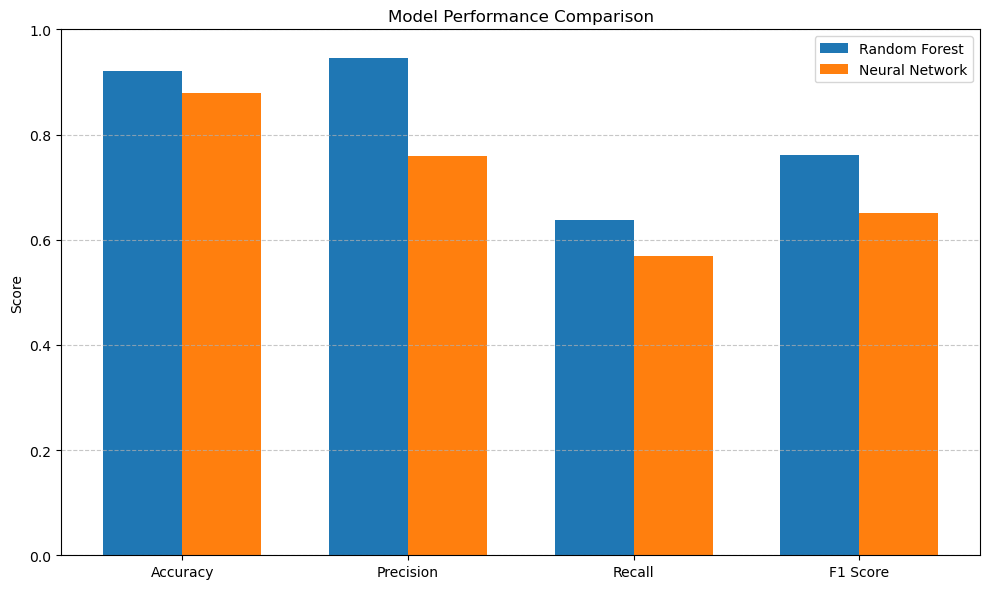

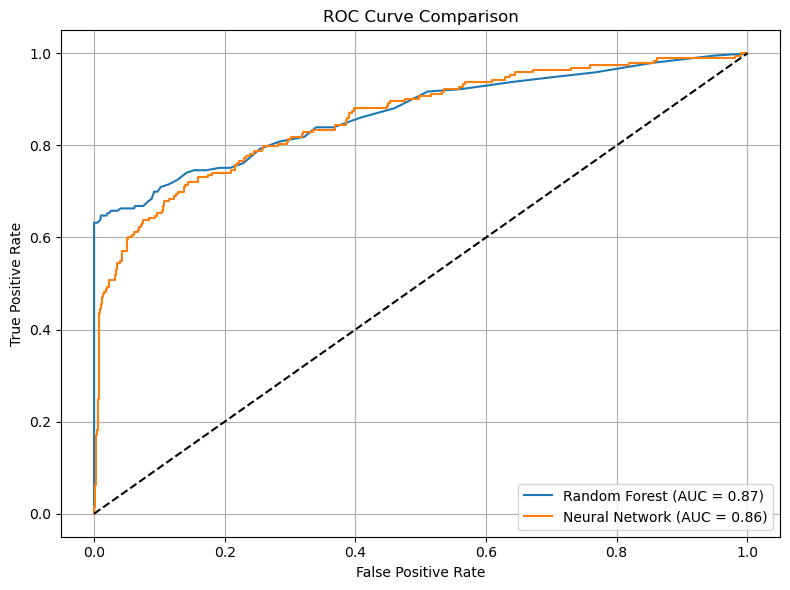

In [4]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# === LOAD DATA ===
df = pd.read_csv("preprocessed_credit_risk.csv")
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# === SPLIT AND SCALE ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === RANDOM FOREST MODEL ===
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# === NEURAL NETWORK (Keras model already trained) ===
# best_model_2 = tuner.get_best_models(num_models=1)[0]
nn_probs = best_model_2.predict(X_test_scaled).ravel()
nn_pred = (nn_probs >= 0.5).astype(int)

# === METRICS COMPARISON ===
metrics = {
    "Accuracy": [accuracy_score(y_test, rf_pred), accuracy_score(y_test, nn_pred)],
    "Precision": [precision_score(y_test, rf_pred), precision_score(y_test, nn_pred)],
    "Recall": [recall_score(y_test, rf_pred), recall_score(y_test, nn_pred)],
    "F1 Score": [f1_score(y_test, rf_pred), f1_score(y_test, nn_pred)],
}

labels = list(metrics.keys())
rf_scores = [metrics[m][0] for m in labels]
nn_scores = [metrics[m][1] for m in labels]
x = np.arange(len(labels))
width = 0.35

# === BAR CHART ===
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_scores, width, label='Random Forest')
plt.bar(x + width/2, nn_scores, width, label='Neural Network')

plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === ROC CURVE ===
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)
auc_rf = auc(fpr_rf, tpr_rf)
auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()
